In [1]:
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt

(290, 290, 3)


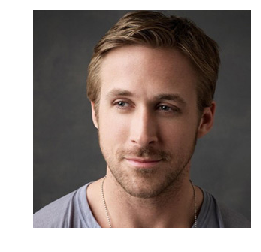

In [2]:
orig_image = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
print(orig_image.shape)
plt.imshow(orig_image)
plt.axis('off')
plt.show()

In [3]:
import math
def gaussian(image, sx, sy):
    a = 0.5
    lx = image.shape[0]
    ly = image.shape[1]
    xo = image.shape[0]//2
    yo = image.shape[1]//2
    for x in range(lx):
        for y in range(ly):
            for i in range(3):
                image[x,y,i] = image[x,y,i]*(a*math.exp(-(((x-xo)**2)/((2*(sx**2)))+(((y-yo)**2)/((2*(sy**2)))))))
    return image

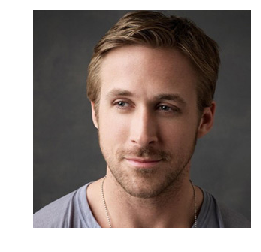

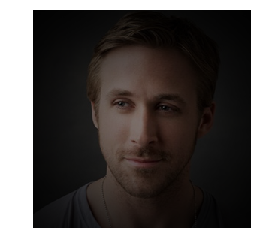

In [4]:
ryan = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
plt.imshow(ryan)
plt.axis('off')
plt.show()
img = gaussian(ryan, ryan.shape[0]//3, ryan.shape[1]//3)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
def gaussian_blur_one(image, s, dim):
    if dim == 1:
        lx = image.shape[0]
        for x in range(lx):
            for i in range(3):
                new = image[x,y,i]*((1/(2*math.pi*(s**2)))*(math.exp(-((x**2 + y**2)/(2*(s**2))))))
                image[x,y,i] = new
    else:
        ly = image.shape[1]
        for y in range(ly):
            for i in range(3):
                new = image[x,y,i]*((1/(2*math.pi*(s**2)))*(math.exp(-((x**2 + y**2)/(2*(s**2))))))
                image[x,y,i] = new
    return image

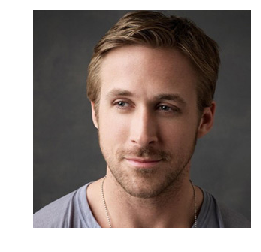

NameError: name 'gaussian_blur' is not defined

In [6]:
ryan2 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
plt.imshow(ryan2)
plt.axis('off')
plt.show()
img2 = gaussian_blur(ryan2)
plt.imshow(img2)
plt.axis('off')
plt.show()

In [34]:
def normalize_float_image(image):
    max0 = np.amax(image[:,:,0])
    min0 = np.amin(image[:,:,0])
    max1 = np.amax(image[:,:,1])
    min1 = np.amin(image[:,:,1])
    max2 = np.amax(image[:,:,2])
    min2 = np.amin(image[:,:,2])
    dim0 = image[:,:,0]
    dim1 = image[:,:,1]
    dim2 = image[:,:,2]
    for i in range(len(dim0)):
        dim0[i] = (dim0[i] - min0)/(max0 - min0)
    for i in range(len(dim1)):
        dim1[i] = (dim1[i] - min1)/(max1 - min1)
    for i in range(len(dim2)):
        dim2[i] = (dim2[i] - min2)/(max2 - min2)
    return image

def convolution(image, kernel):
    new_image = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2, 3))
    kx = kernel.shape[0]
    ky = kernel.shape[1]
    for row in range(1, image.shape[1]):
        for col in range(1, image.shape[0]):
            for d in range(3):
                image_padded[row,col, d] = image[row-1, col-1, d]
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            for d in range(3):
                new_image[y,x,d] = (kernel*image_padded[y:y+3,x:x+3,d]).sum()
    new_image = np.clip(new_image, 0, None)
    return normalize_float_image(new_image)

def median_ignore(arr):
    med = []
    for i in np.nditer(arr):
        if i > 0:
            med.append(i)
    if not med:
        return 0
    return np.median(med)

def median_filter(image, window_size):
    new_image = np.zeros_like(image)
    if image.shape[2] > 3:
        for row in new_image:
            for col in row:
                col[3] = 1
    image_padded = np.zeros((image.shape[0] + window_size-1, image.shape[1] + window_size-1, 3))
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            for d in range(3):
                image_padded[row+window_size-1,col+window_size-1, d] = image[row, col, d]
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            for d in range(3):
                new_image[row,col,d] = median_ignore(image_padded[row:row+window_size,col:col+window_size,d])
    new_image = np.clip(new_image, 0, None)
    return normalize_float_image(new_image)

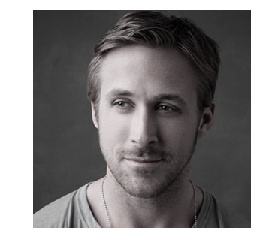

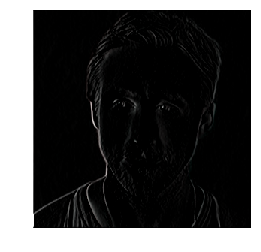

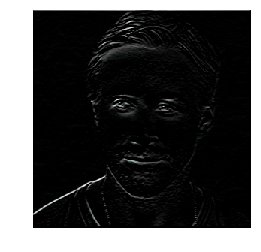

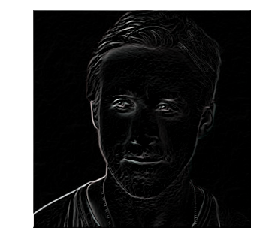

In [32]:
ryan3 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
ryang = grayscale(ryan3)
plt.imshow(ryang)
plt.axis('off')
plt.show()
img3 = convolution(ryan3, np.array([[-2,0,2],[-4,0,4],[-2,0,2]]))
plt.imshow(img3)
plt.axis('off')
plt.show()
img4 = convolution(ryan3, np.array([[-2,0,2],[-4,0,4],[-2,0,2]]).T)
plt.imshow(img4)
plt.axis('off')
plt.show()
img5 = ryan3
for i in range(3):
    img5[:,:,i] = np.sqrt(img3[:,:,i]**2 + img4[:,:,i]**2)
plt.imshow(normalize_float_image(img5))
plt.axis('off')
plt.show()

In [49]:
def boxed_blur(image):
    new_image = convolution(image, np.array([[0.2,0.2,0.2],[0.2,0.2,0.2],[0.2,0.2,0.2]]))
    return new_image

def embossed(image):
    new_image = convolution(image, np.array([[-2,0,2],[-4,0,4],[-2,0,2]]).T)
    return new_image

def sharpen(image):
    new_image = convolution(image, np.array([[0,-1,0],[-1,7,-1],[0,-1,0]]))
    return new_image

def gaussian_blur(image):
    new_image = convolution(image, np.array([[1,2,1],[2,4,2],[1,2,1]]))
    return new_image

def edge1(image):
    new_image = convolution(image, np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]))
    return new_image

def detailed_edge(image):
    new_image = np.zeros_like(image)
    reg = convolution(ryan3, np.array([[-2,0,2],[-4,0,4],[-2,0,2]]))
    regt = convolution(ryan3, np.array([[-2,0,2],[-4,0,4],[-2,0,2]]).T)
    for i in range(3):
        new_image[:,:,i] = np.sqrt(img3[:,:,i]**2 + img4[:,:,i]**2)
    return new_image

def grayscale(image):
    new_image = np.zeros_like(image)
    dim0 = image[:,:,0]
    dim1 = image[:,:,1]
    dim2 = image[:,:,2]
    for i in range(len(dim0)):
        dim0[i] = dim0[i] * 0.299 + dim1[i] * 0.587 + dim2[i] * 0.114
    for i in range(len(dim1)):
        dim1[i] = dim0[i] * 0.299 + dim1[i] * 0.587 + dim2[i] * 0.114
    for i in range(len(dim2)):
        dim2[i] = dim0[i] * 0.299 + dim1[i] * 0.587 + dim2[i] * 0.114
    new_image[:,:,0] = dim0
    new_image[:,:,1] = dim1
    new_image[:,:,2] = dim2
    return new_image

def segment(image):
    new_image = image[:,:,:]
    i = 0
    j = 0
    for row in image:
        j = 0
        for col in row:
            d = col.argmax()
            new_image[i,j,d] = 0
            j += 1
        i += 1
    return (new_image)

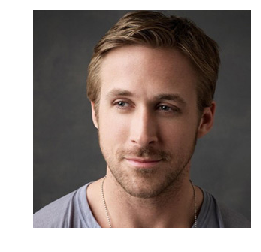

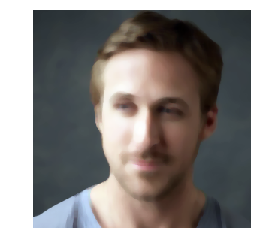

In [35]:
ryan4 = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
plt.imshow(ryan4)
plt.axis('off')
plt.show()
img9 = median_filter(ryan4, 9)
plt.imshow(img9)
plt.axis('off')
plt.show()

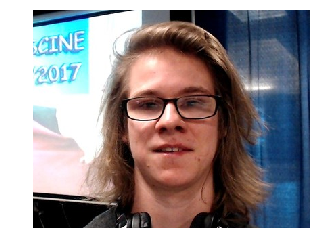

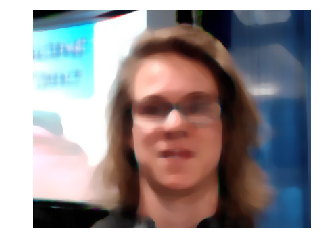

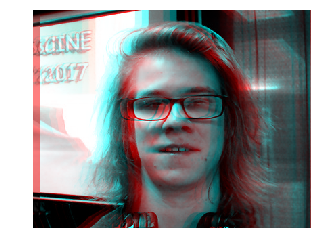

In [95]:
scollet = plt.imread('https://image.ibb.co/deFoSG/lol.png')
plt.imshow(scollet)
plt.axis('off')
plt.show()
img9 = median_filter(scollet, 15)
plt.imshow(img9)
plt.axis('off')
plt.show()
scolletshift = shift(scollet)
plt.imshow(scolletshift)
plt.axis('off')
plt.show()

In [93]:
def shift(image):
    new_image = image[:,:,:]
    gray = grayscale(image)
    r = red_channel(image)
    g = green_channel(image)
    b = blue_channel(image)
    for row in range(image.shape[0]):
        for col in range(image.shape[1]-10):
            new_image[row, col, 0] = gray[row,col,0] + r[row,col+10,0]
            new_image[row, col+10, 1] = gray[row,col,1] + g[row,col,1]
            new_image[row, col+10, 2] = gray[row,col,2] + b[row,col,2]
    return normalize_float_image(new_image)

def red_channel(image):
    new_image = np.zeros_like(image)
    new_image[:,:,0] = image[:,:,0]
    return new_image

def green_channel(image):
    new_image = np.zeros_like(image)
    new_image[:,:,1] = image[:,:,1]
    return new_image

def blue_channel(image):
    new_image = np.zeros_like(image)
    new_image[:,:,2] = image[:,:,2]
    return new_image

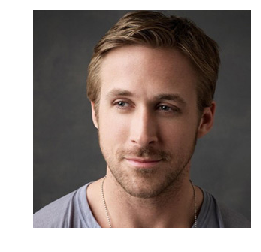

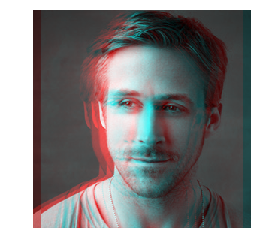

In [94]:
ryanshift = plt.imread('https://image.ibb.co/g20pjw/01_normal.png')
plt.imshow(ryanshift)
plt.axis('off')
plt.show()
imgred = shift(ryanshift)
plt.imshow(imgred)
plt.axis('off')
plt.show()